# Домашняя работа 2

В этой доамшней работе вам предлагается обучить классификатор, распознающий вид блюда по фотографии. Прямо как на семинаре, только больше разной еды!

 # Home Work 2

In this hw assignment you have to train a classifier to distinguish between different food variations. Just like at our practice, but with more foods variety!

## Но сперва... Теория
Необходимо решить теоретические задачи, используя Latex, внутри этого ноутбука
## But first... Theory
Solve the theoretical problems. Type the solutions here, using Latex

### Задача 1 (2 балла)
### Problem 1 (2 points)

Посчитайте результат применения операции свертки с ядром K к матрице X. Параметры свертки следующие: stride=2, dilation=2, padding=1 (паддинг осуществляется нулями).

Compute the result of convolution operation with kernel K to a matrix X.
Convolution params are: stride=2, dilation=2, padding=1 (padding with zeros)


$   X = \begin{bmatrix}
        1 & 0 & -4 & 2 \\
        5 & 2 & 3 & 0 \\
        -1 & 0 & 1 & 4 \\
        0 & -3 & 2 & -1
    \end{bmatrix}
    K = \begin{bmatrix}
        2 & 1 \\
        -1 & -2
    \end{bmatrix}
$

#### Решение  ================= Solution

---
---

Given:

$$
 X = \begin{bmatrix}
        1 & 0 & -4 & 2 \\
        5 & 2 & 3 & 0 \\
        -1 & 0 & 1 & 4 \\
        0 & -3 & 2 & -1
    \end{bmatrix}
    K = \begin{bmatrix}
        2 & 1 \\
        -1 & -2
    \end{bmatrix}
$$

Adjust X and K according to params `padding=1` `dilation=2`

$$
    X_{padded} = \begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & -4 & 2 & 0 \\
    0 & 5 & 2 & 3 & 0 & 0 \\
    0 & -1 & 0 & 1 & 4 & 0 \\
    0 & 0 & -3 & 2 & -1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0
    \end{bmatrix}
    \quad
    K_{dilated} = \begin{bmatrix}
    2 & 0 & 1 \\
    0 & 0 & 0 \\
    -1 & 0 & -2
    \end{bmatrix}
$$


Parts of $X$ that are affected by $K$ according to `stride=2`:

$$
\begin{alignat*}{2}
  & X_{padded}^{(0,0)} = \begin{bmatrix}
    0 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 5 & 2 \\
    \end{bmatrix}
  \quad &&
  X_{padded}^{(0,2)} = \begin{bmatrix}
    0 & 0 & 0 \\
    0 & -4 & 2 \\
    2 & 3 & 0 \\
    \end{bmatrix}
  \\
  & X_{padded}^{(2,0)} = \begin{bmatrix}
    0 & 5 & 2 \\
    0 & -1 & 0 \\
    0 & 0 & -3 \\
    \end{bmatrix}
  \quad &&
  X_{padded}^{(2,2)} = \begin{bmatrix}
    2 & 3 & 0 \\
    0 & 1 & 4 \\
    -3 & 2 & -1 \\
    \end{bmatrix}
\end{alignat*}
$$


Result matrix:

$$
    Result = \begin{bmatrix}
    2 \cdot (-2) &
    2 \cdot (-1) \\
    2 \cdot 1 + (-3) \cdot (-2) &
    2 \cdot 2 + (-3) \cdot (-1) + (-1) \cdot (-2) 
    \end{bmatrix} = 
    \begin{bmatrix}
    -4 & -2 \\
    8 & 9
    \end{bmatrix}
$$

$$
    Result = \begin{bmatrix}
    -4 & -2 \\
    8 & 9
    \end{bmatrix}
$$

---
---


### Задача 2 (2 балла)
### Problem 2 (2 points)

Посчитайте число обучаемых параметров в нейронной сети, архитектура которой выглядит следующим образом:

        model = nn.Sequential(
            nn.Conv2d(
                in_channels=3, out_channels=16, kernel_size=5,
                stride=2, padding=0, dilation=1, bias=True
            ),
            nn.BatchNorm2d(num_features=16),
            nn.LeakyReLU(0.1),
            nn.Conv2d(
                in_channels=16, out_channels=32, kernel_size=5,
                stride=1, padding=1, dilation=2, bias=False
            ),
            nn.BatchNorm2d(num_features=32),
            nn.Sigmoid(),
        )
  

#### Решение =================== Solution

Вам необходимо расписать решение формулами

You need to justify every step

---
---

We have 2 convolutional layers (Conv2d) and 2 normalization layers (BatchNorm2d).

1. The first conv. layer (Conv2d), `bias == True` so we add $1$ for bias param.:
$$\text{N}_{\text{Conv2d}} = (\text{kernel\_size}^2 \times \text{in\_channels} + 1 \times \text{bias}) \times \text{out\_channels}$$

$$\text{N}_{\text{Conv2d}^1} = (5^2 \times 3 + 1) \times 16 = 1216$$

2. The first norm. layer (BatchNorm2d) has 2 learning params $\gamma$ and $\beta$:
$$\text{N}_{\text{BatchNorm2d}} = 2 \times \text{num\_features}$$

$$\text{N}_{\text{BatchNorm2d}^1} = 2 \times 16 = 32$$

3. The second conv. layer has `dilation` set but it doesn't affect the number of params. Also `bias == False` so:
$$\text{N}_{\text{Conv2d}} = (\text{kernel\_size}^2 \times \text{in\_channels} + 1 \times \text{bias}) \times \text{out\_channels}$$
$$\text{N}_{\text{Conv2d}^2} = (5^2 \times 16 + 0) \times 32 = 12800$$

4. The first norm. layer also has 2 params:

$$\text{N}_{\text{BatchNorm2d}^2} = 2 \times 32 = 64$$

5. Activation layers (LeakyReLU и Sigmoid) has no params.

6. The result is:
   
$$\sum = \text{N}_{\text{Conv2d}^1} + \text{N}_{\text{BatchNorm2d}^1} + \text{N}_{\text{Conv2d}^2} + \text{N}_{\text{BatchNorm2d}^2} = 1216 + 32 + 12800 + 64 = 14112$$

In [7]:
model = nn.Sequential(
            nn.Conv2d(
                in_channels=3, out_channels=16, kernel_size=5,
                stride=2, padding=0, dilation=1, bias=True
            ),
            nn.BatchNorm2d(num_features=16),
            nn.LeakyReLU(0.1),
            nn.Conv2d(
                in_channels=16, out_channels=32, kernel_size=5,
                stride=1, padding=1, dilation=2, bias=False
            ),
            nn.BatchNorm2d(num_features=32),
            nn.Sigmoid(),
        )
log.info("Model params num:",sum(p.numel() for p in model.parameters()))



[INFO]: Model params num: 14112


---
---

### Практическое задание
### Practical problem

Вам необходимо решить задачу многоклассовой классификации для датасета Food101

Solve multicalss classification problem for Food101 dataset

####  Служебный код

In [3]:
import copy
import random
import os
import shutil
import tarfile
from urllib.request import urlretrieve

import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from torchvision import datasets, transforms, models
from torch.utils.data import random_split, DataLoader, Dataset

import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)


In [6]:
class SimpleLogger:
  level = 0

  def debug(self, *params):
    if self.level == 0:
      print('\033[1m[DEBUG]\033[0m:', *params)

  def info(self, *params):
    if self.level <= 1:
      print('\033[96m\033[1m[INFO]\033[0m:', *params)

  def warning(self, *params):
    if self.level <= 2:
      print('\033[93m\033[1m[WARNING]\033[0m:', *params)

  def error(self, *params):
    if self.level <= 3:
      print('\033[31m\033[1m[ERROR]\033[0m:', *params)

  def set_level(self, level=0):
    self.level = level


log = SimpleLogger()
log.set_level(0)

# log.debug()
# log.info()
# log.warning()
# log.error()


In [8]:
class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)


def download_url(url, filepath):
    directory = os.path.dirname(os.path.abspath(filepath))
    os.makedirs(directory, exist_ok=True)
    if os.path.exists(filepath):
        log.info('Filepath already exists. Skipping download.')
        return

    with TqdmUpTo(unit='B', unit_scale=True, unit_divisor=1024, miniters=1, desc=os.path.basename(filepath)) as t:
        urlretrieve(url, filename=filepath, reporthook=t.update_to, data=None)
        t.total = t.n


def extract_archive(filepath):
    extract_dir = os.path.dirname(os.path.abspath(filepath))
    shutil.unpack_archive(filepath, extract_dir)

In [9]:
url = 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'

In [10]:
dataset_directory = os.path.join(
    os.environ['HOME'], 'hse/hse-hw/dl/2/datasets/food101')

In [11]:
filepath = os.path.join(dataset_directory, 'food101.tar.gz')
download_url(
    url=url,
    filepath=filepath,
)
log.info('downloaded')
%time extract_archive(filepath)

[INFO]: Filepath already exists. Skipping download.
[INFO]: downloaded
CPU times: user 44.4 s, sys: 25.8 s, total: 1min 10s
Wall time: 4min 40s


### Dataloaders (1 point)


In [12]:
NUM_WORKERS = os.cpu_count()
log.info(NUM_WORKERS)

def split_data(dataset, val_size: float = 0.2, seed: int = 42):
    """
    """
    generator = torch.Generator().manual_seed(seed)
    train_data, test_data = random_split(
        dataset, [1 - val_size, val_size], generator=generator)

    return train_data, test_data


def create_dataloaders(
    data_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int = NUM_WORKERS
):
  """Creates training and testing DataLoaders.

  Takes in a training directory and testing directory path and turns
  them into PyTorch Datasets and then into PyTorch DataLoaders.

  Args:
    train_dir: Path to training directory.
    test_dir: Path to testing directory.
    transform: torchvision transforms to perform on training and testing data.
    batch_size: Number of samples per batch in each of the DataLoaders.
    num_workers: An integer for number of workers per DataLoader.

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of the target classes.
    Example usage:
      train_dataloader, test_dataloader, class_names
        = create_dataloaders(train_dir=path/to/train_dir,
                             test_dir=path/to/test_dir,
                             transform=some_transform,
                             batch_size=32,
                             num_workers=4)
  """

  # Create a dataset using ImageFolder
  dataset = datasets.ImageFolder(root=data_dir, transform=transform)

  # Split the dataset into train and test sets
  train_set, test_set = split_data(dataset)

  # Get class names
  classes = dataset.classes

  # Turn datasets into dataloaders
  train_dataloader = DataLoader(
      train_set,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_set,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, classes

[INFO]: 8


In [ ]:
%pip install  torchinfo

In [13]:
from torchinfo import summary
# try:
#     from torchinfo import summary
# except:
#     log.info('Couldn\'t find torchinfo... installing it.')
#     %pip install  torchinfo
#     from torchinfo import summary

In [14]:
from pathlib import Path

data_path = Path(dataset_directory)
image_path = data_path / "food-101" / "images"
log.info(image_path)

[INFO]: /home/jupyter/hse/hse-hw/dl/2/datasets/food101/food-101/images


 Опишите трасформы. Можно добавить аугментаций для лучшего результата.

 Можете использовать библиотеку  Albumentation или torchvision

  Не забудьте отмасштабировать размер картинов и нормализовать их

In [15]:
# Create a transforms pipeline manually (required for torchvision < 0.13)

# 1. Reshape data HxW to fit model
# 2. Turn image values to between 0 & 1
# 3.1 A mean of [0.485, 0.456, 0.406] (across each colour channel)
# 3.2 A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),

IMAGE_SIZE = 224

manual_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

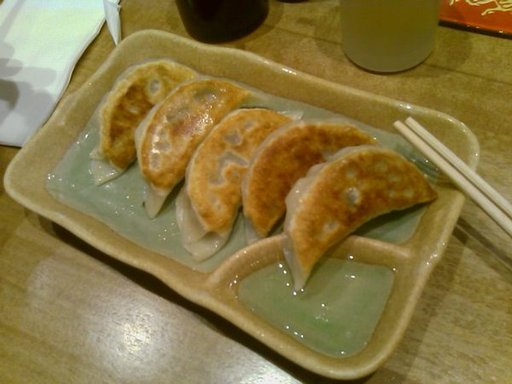

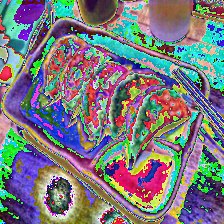

In [29]:
from PIL import Image
img = Image.open(str(image_path / 'gyoza' / '1640.jpg'))
display(img)
display(transforms.ToPILImage()(manual_transforms(img)))

In [30]:
train_dlr, test_dlr, classes = create_dataloaders(
    data_dir=image_path,
    transform=manual_transforms,
    batch_size=32
)
log.info('Class names: [', ', '.join(classes), ']')

[INFO]: Class names: [ apple_pie, baby_back_ribs, baklava, beef_carpaccio, beef_tartare, beet_salad, beignets, bibimbap, bread_pudding, breakfast_burrito, bruschetta, caesar_salad, cannoli, caprese_salad, carrot_cake, ceviche, cheese_plate, cheesecake, chicken_curry, chicken_quesadilla, chicken_wings, chocolate_cake, chocolate_mousse, churros, clam_chowder, club_sandwich, crab_cakes, creme_brulee, croque_madame, cup_cakes, deviled_eggs, donuts, dumplings, edamame, eggs_benedict, escargots, falafel, filet_mignon, fish_and_chips, foie_gras, french_fries, french_onion_soup, french_toast, fried_calamari, fried_rice, frozen_yogurt, garlic_bread, gnocchi, greek_salad, grilled_cheese_sandwich, grilled_salmon, guacamole, gyoza, hamburger, hot_and_sour_soup, hot_dog, huevos_rancheros, hummus, ice_cream, lasagna, lobster_bisque, lobster_roll_sandwich, macaroni_and_cheese, macarons, miso_soup, mussels, nachos, omelette, onion_rings, oysters, pad_thai, paella, pancakes, panna_cotta, peking_duck, p

 #### Train function (2 points)


Напишите функцию трейна. Мы делали нечто похожее на семинаре

In [82]:
import torch

# from tqdm.auto import tqdm
from tqdm.notebook import tqdm
from typing import Dict, List, Tuple

model_path = os.path.join(os.environ['HOME'], 'hse/hse-hw/dl/2/')


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Taken form Seminar_8

    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for _, (X, y) in enumerate(tqdm(dataloader, desc='train_step', unit='batch', leave=False)):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Return adjusted average per batch metrics
    return train_loss / len(dataloader), train_acc / len(dataloader)


def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Taken form Seminar_8

    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for _, (X, y) in enumerate(tqdm(dataloader, desc='test_step', unit='batch', leave=False)):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() /
                         len(test_pred_labels))

    # Return adjusted average per batch metrics
    return test_loss / len(dataloader), test_acc / len(dataloader)


def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
               }

    # Make sure model on target device
    model.to(device)

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs), desc='train', unit='epoch'):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        # Print out what's happening
        log.info(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

        torch.save({
            'epoch': epochs+1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss_fn,
        }, model_path + f'{epoch+1}_iter.pth')

    # Return the filled results at the end of the epochs
    return results

Выберете модель из доступных

In [39]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
log.debug('device selected:',device)

model = torchvision.models.efficientnet_v2_s(weights='EfficientNet_V2_S_Weights.DEFAULT')
model = model.to(device)

[DEBUG]: device selected: cuda


Заморозьте некоторые слои или обучайте модель целиком

In [ ]:
###
### Выберете слои, через которые не будут течь градиенты
###

Взглянем на модель

In [40]:
summary(model=model,
        input_size=(32, 3, IMAGE_SIZE, IMAGE_SIZE), # make sure this is "input_size", not "input_shape"
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 24, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 24, 112, 112]   648                  True
│    │    └─BatchNorm2d (1)                                  [32, 24, 112, 112]   [32, 24, 112, 112]   48                   True
│    │    └─SiLU (2)                                         [32, 24, 112, 112]   [32, 24, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 24, 112, 112]   [32, 24, 112

### Train (1 point)

In [80]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 15
device = 'cuda' if torch.cuda.is_available() else 'cpu'
log.debug('train batches:', len(train_dlr))

[DEBUG]: train batches: 2525


In [83]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = train(model=model,
                       train_dataloader=train_dlr,
                       test_dataloader=test_dlr,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=n_epochs,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
log.info(f"Total training time: {end_time-start_time:.3f} seconds")


train:   0%|          | 0/15 [00:00<?, ?epoch/s]

train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 1 | train_loss: 0.3696 | train_acc: 0.8873 | test_loss: 1.3077 | test_acc: 0.7113


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 2 | train_loss: 0.6438 | train_acc: 0.8123 | test_loss: 1.0299 | test_acc: 0.7494


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 3 | train_loss: 0.4830 | train_acc: 0.8558 | test_loss: 1.0232 | test_acc: 0.7507


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 4 | train_loss: 0.4075 | train_acc: 0.8764 | test_loss: 1.0984 | test_acc: 0.7447


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 5 | train_loss: 0.3465 | train_acc: 0.8944 | test_loss: 1.0602 | test_acc: 0.7606


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 6 | train_loss: 0.3032 | train_acc: 0.9062 | test_loss: 1.0645 | test_acc: 0.7614


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 7 | train_loss: 0.2721 | train_acc: 0.9144 | test_loss: 1.0791 | test_acc: 0.7617


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 8 | train_loss: 0.2398 | train_acc: 0.9252 | test_loss: 1.1399 | test_acc: 0.7519


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 9 | train_loss: 0.2143 | train_acc: 0.9318 | test_loss: 1.2081 | test_acc: 0.7501


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 10 | train_loss: 0.2016 | train_acc: 0.9358 | test_loss: 1.1568 | test_acc: 0.7684


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 11 | train_loss: 0.1843 | train_acc: 0.9412 | test_loss: 1.2083 | test_acc: 0.7595


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 12 | train_loss: 0.1720 | train_acc: 0.9448 | test_loss: 1.2265 | test_acc: 0.7556


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 13 | train_loss: 0.1636 | train_acc: 0.9471 | test_loss: 1.2362 | test_acc: 0.7575


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 14 | train_loss: 0.1524 | train_acc: 0.9511 | test_loss: 1.2481 | test_acc: 0.7590


train_step:   0%|          | 0/2525 [00:00<?, ?batch/s]

test_step:   0%|          | 0/632 [00:00<?, ?batch/s]

[INFO]: Epoch: 15 | train_loss: 0.1431 | train_acc: 0.9535 | test_loss: 1.2172 | test_acc: 0.7654
[INFO]: Total training time: 5187.248 seconds


```
[INFO]: Epoch: 1  | train_loss: 0.3696 | train_acc: 0.8873 | test_loss: 1.3077 | test_acc: 0.7113
[INFO]: Epoch: 2  | train_loss: 0.6438 | train_acc: 0.8123 | test_loss: 1.0299 | test_acc: 0.7494
[INFO]: Epoch: 3  | train_loss: 0.4830 | train_acc: 0.8558 | test_loss: 1.0232 | test_acc: 0.7507
[INFO]: Epoch: 4  | train_loss: 0.4075 | train_acc: 0.8764 | test_loss: 1.0984 | test_acc: 0.7447
[INFO]: Epoch: 5  | train_loss: 0.3465 | train_acc: 0.8944 | test_loss: 1.0602 | test_acc: 0.7606
[INFO]: Epoch: 6  | train_loss: 0.3032 | train_acc: 0.9062 | test_loss: 1.0645 | test_acc: 0.7614
[INFO]: Epoch: 7  | train_loss: 0.2721 | train_acc: 0.9144 | test_loss: 1.0791 | test_acc: 0.7617
[INFO]: Epoch: 8  | train_loss: 0.2398 | train_acc: 0.9252 | test_loss: 1.1399 | test_acc: 0.7519
[INFO]: Epoch: 9  | train_loss: 0.2143 | train_acc: 0.9318 | test_loss: 1.2081 | test_acc: 0.7501
[INFO]: Epoch: 10 | train_loss: 0.2016 | train_acc: 0.9358 | test_loss: 1.1568 | test_acc: 0.7684
[INFO]: Epoch: 11 | train_loss: 0.1843 | train_acc: 0.9412 | test_loss: 1.2083 | test_acc: 0.7595
[INFO]: Epoch: 12 | train_loss: 0.1720 | train_acc: 0.9448 | test_loss: 1.2265 | test_acc: 0.7556
[INFO]: Epoch: 13 | train_loss: 0.1636 | train_acc: 0.9471 | test_loss: 1.2362 | test_acc: 0.7575
[INFO]: Epoch: 14 | train_loss: 0.1524 | train_acc: 0.9511 | test_loss: 1.2481 | test_acc: 0.7590
[INFO]: Epoch: 15 | train_loss: 0.1431 | train_acc: 0.9535 | test_loss: 1.2172 | test_acc: 0.7654
[INFO]: Total training time: 5187.248 seconds
```

### Results (2 points in total)
Отрисуйте графики лосса для трейна и валидации

Продемонстрируйте работу сетки на каких-нибудь картинках. Помните, что для тестирования лучше иметь отдельный тестовый сет. Для этого либо сами, либо с помощью кода, который был на прошлом семинаре, скачайте несколько фотографий с едой и попробуйте распознать ее.

Либо заранее отложите некоторое кол-во фотографий в тестовую выборку. Из кода должно быть понятно, что вы это сделали.

Это, например, можно сделать, поделив data_test на две выборки с помощью функции split_data, которая у вас есть




#### Graphs (1 point)
Plot graphs for train and val loss

Графикии трейн и вал лосса

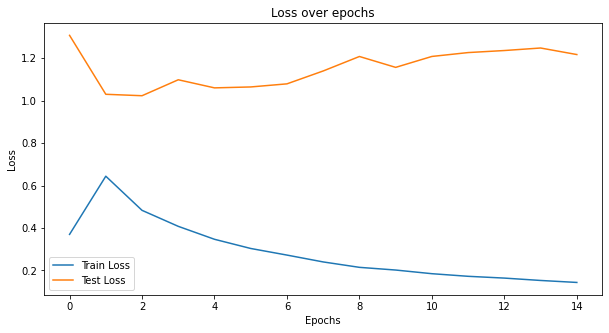

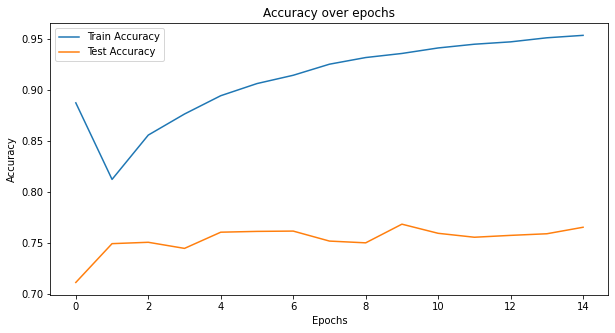

In [85]:
# Train Loss
plt.figure(figsize=(10,5))
plt.plot(results['train_loss'], label='Train Loss')
plt.plot(results['test_loss'], label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Train Accuracy
plt.figure(figsize=(10,5))
plt.plot(results['train_acc'], label='Train Accuracy')
plt.plot(results['test_acc'], label='Test Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Demonstration (1 point)

 Покажите качество работы модели, прогнав несколько фотографий через нее

In [106]:
def predict_image_class(model: torch.nn.Module,
                        image: Image.Image,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device,
                        plot: bool = True):
    """Predicts class of an image object
    
    Args:
        model (torch.nn.Module): trained model
        image (Image.Image): image
        class_names (List[str]): possible classes
        image_size (Tuple[int, int], optional): image size. Defaults to (224, 224).
        transform (torchvision.transforms, optional): transform. Defaults to None.
        device (torch.device, optional): target device. Defaults to device.
    """

    # Create transformation if one doesn't exist
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    # Make sure the model is on the target device
    model.to(device)

    # Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(image).unsqueeze(dim=0)

      # Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Plot image with predicted label and probability
    plt.figure()
    plt.imshow(image)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.5f}")
    plt.axis(False)
    plt.show()

In [108]:
import requests
from io import BytesIO


def predict_internet_pic(url: str):
    response = requests.get(url)
    log.debug('Downloaded:', url)
    img = Image.open(BytesIO(response.content))    
    predict_image_class(model=model,image=img, class_names=classes)

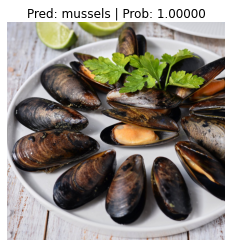

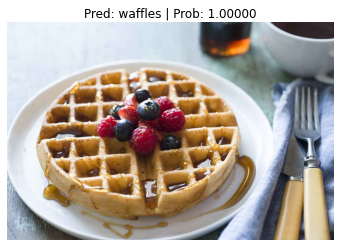

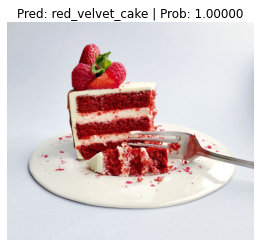

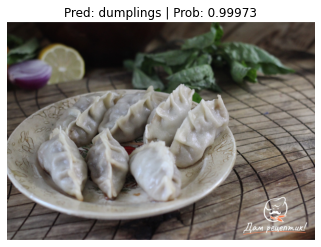

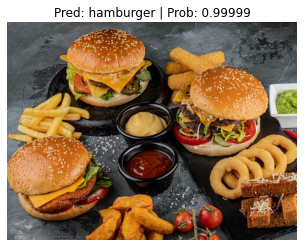

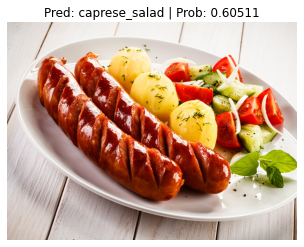

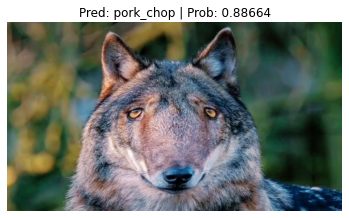

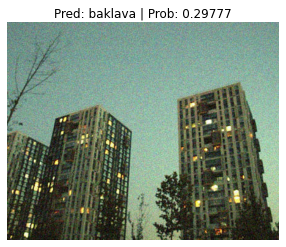

In [110]:
log.set_level(1)

url1 = 'https://mykaleidoscope.ru/x/uploads/posts/2022-09/1663909438_18-mykaleidoscope-ru-p-midii-v-stvorkakh-yeda-oboi-24.jpg'
predict_internet_pic(url1)

url2 = 'http://klublady.ru/uploads/posts/2022-02/1644873598_16-klublady-ru-p-vafli-kruglie-foto-19.jpg'
predict_internet_pic(url2)

url3 = 'https://cdn.lmbd.ru/3d5b4eb5-526e-456a-abf7-f5f2fd958fff/-/preview/1666x920/-/format/jpeg/'
predict_internet_pic(url3)

url4 = 'https://damreceptic.ru/upload/resize_cache/iblock/b01/602_0_1/b01f5f3812e298abf505d76b68323b45.jpg'
predict_internet_pic(url4)

url5 = 'https://eda.yandex.ru/images/3506707/41d2ccf5c6566c55f03bfe79713cbf81-1100x825.jpg'
predict_internet_pic(url5)

url6 = 'https://s1.1zoom.me/b4652/504/The_second_dishes_Vienna_sausage_Potato_Wood_520555_1600x1200.jpg'
predict_internet_pic(url6)

url7 = 'https://i.ytimg.com/vi/CNtDxTPpfUg/maxresdefault.jpg'
predict_internet_pic(url7)

url8 = 'https://creativo.one/lessons/2008/031208/1.jpg'
predict_internet_pic(url8)

